In [81]:
import pandas as pd
import numpy as np
import math
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)

In [82]:
df = pd.read_csv('result.csv', header=None)
df.columns = ['n', 'sum'] + ['gamma%d' % i for i in xrange(1,31)]
df['diff'] = 1 - df['sum']
for i in xrange(1,31):
    last = df['gamma%d' % i].values[-1]
    df['gamma%d_norm' % i ] = df['gamma%d' % i ] / last
df
ps = []

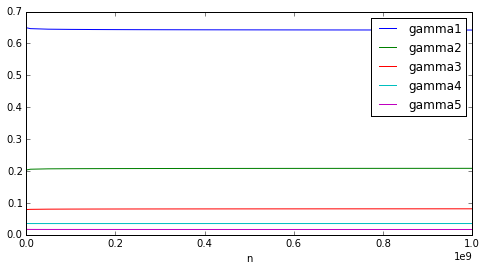

In [83]:
ps.append(df.plot("n", ["gamma1", "gamma2", "gamma3", "gamma4", "gamma5"]))

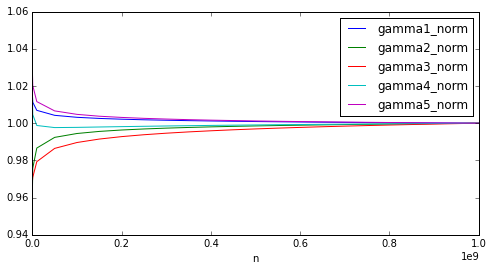

In [84]:
ps.append(df.plot("n", ["gamma1_norm", "gamma2_norm", "gamma3_norm", "gamma4_norm", "gamma5_norm"]))

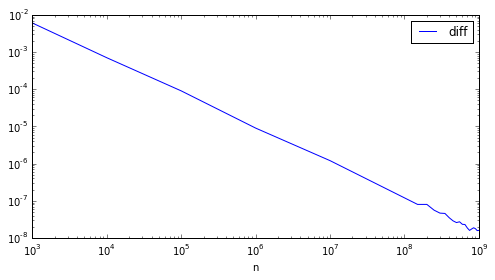

In [85]:
ps.append(df.plot("n", "diff", loglog=True))

y = -0.324245 x + -0.112445


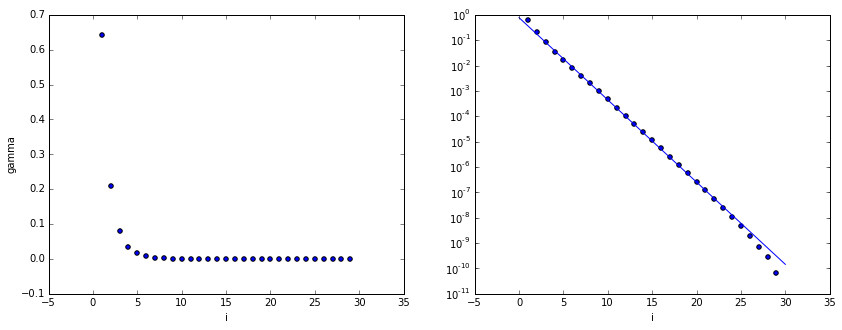

In [89]:
gammas = pd.DataFrame([(i, df.tail(1)['gamma%d' % i].values[0]) for i in xrange(1,30)])
gammas.columns = ['i', 'gamma']
gammas['gamma_log'] = [math.log10(x) for x in gammas['gamma']]
fit = gammas[2:24]
a, b = np.polyfit(fit['i'].values, [math.log10(x) for x in fit['gamma'].values], 1)
print 'y = %f x + %f' % (a, b)
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1).set_ylabel('gamma')
plt.subplot(1,2,1).set_xlabel('i')
plt.subplot(1,2,1).scatter(gammas['i'], gammas['gamma'])
plt.subplot(1,2,2).set_yscale('log')
plt.subplot(1,2,2).set_xlabel('i')
plt.subplot(1,2,2).plot([0, 30], [10**b, 10**(30*a+b)], '-')
plt.subplot(1,2,2).scatter(gammas['i'], gammas['gamma'])
ps.append(plt.subplot(1,2,2))

In [90]:
for (i,p) in enumerate(ps):
    p.figure.savefig('plots/%d.pdf' % i, format='pdf')